# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
# Libraries for Exploratory Data Analysis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import variation



# Sklearn libraries for Machine Learning Algorithms and Evaluation metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

# Boosting Methods
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')


# To expand the output display
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150) 

import pickle 

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_female = pd.read_csv('ANSUR II FEMALE Public.csv', encoding = 'latin-1')
df_female.head().T 

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
axillaheight,1180,1292,1271,1250,1210
balloffootcircumference,222,225,237,240,217
balloffootlength,177,178,196,188,182
biacromialbreadth,373,372,397,384,378
bicepscircumferenceflexed,315,272,300,364,320


In [3]:
df_male = pd.read_csv('ANSUR II MALE Public.csv', encoding = 'latin-1')
df_male.head().T 

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [4]:
df_female.shape, df_male.shape 

((1986, 108), (4082, 108))

In [5]:
# Before concat female and male data sets, we realize that there two names for the same feature: 'SubjectId' and 'subjectid'
# Let's fix it! 

df_female = df_female.rename(columns = {"SubjectId":"subjectid"})
df_female.head().T 

,0,1,2,3,4
subjectid,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
axillaheight,1180,1292,1271,1250,1210
balloffootcircumference,222,225,237,240,217
balloffootlength,177,178,196,188,182
biacromialbreadth,373,372,397,384,378
bicepscircumferenceflexed,315,272,300,364,320


In [6]:
df = pd.concat([df_female,df_male])
df.shape 

(6068, 108)

In [7]:
df.head().T 

,0,1,2,3,4
subjectid,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
axillaheight,1180,1292,1271,1250,1210
balloffootcircumference,222,225,237,240,217
balloffootlength,177,178,196,188,182
biacromialbreadth,373,372,397,384,378
bicepscircumferenceflexed,315,272,300,364,320


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [8]:
df.isnull().any().any() 

True

In [9]:
df.duplicated().any() 

False

In [10]:
# Let's find which feature has missing values

columns_with_missing_values = df.isnull().sum()
columns_with_missing_values = columns_with_missing_values[columns_with_missing_values > 0]
print("Columns with Missing Values:")
print(columns_with_missing_values) 

Columns with Missing Values:
Ethnicity    4647
dtype: int64


In [11]:
# We drop the Ethnicity column, since it has so many missing values. 

df.drop('Ethnicity', axis=1, inplace=True)

df.isnull().any().any() 

False

In [12]:
# Let's digger inside "SubjectNumericRace" and "DODRace" columns 

df[["DODRace","SubjectNumericRace"]] 

,DODRace,SubjectNumericRace
0,2,2
1,3,3
2,1,1
3,2,8
4,1,1
...,...,...
4077,1,51
4078,1,1
4079,1,1
4080,1,1


**Information about these two features:** 

**SubjectNumericRace** – Subject Numeric Race; a single or multi-digit code indicating a subject’s self-reported race or races (verified through interview). Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

**DODRace** – Department of Defense Race; a single digit indicating a subject’s self-reported preferred single race where selecting multiple races is not an option. This variable is intended to be comparable to the Defense Manpower Data Center demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other 

In [13]:
# Select rows where "DODRace" is not equal to "SubjectNumericRace"
mismatched_rows = df[df['DODRace'] != df['SubjectNumericRace']]


mismatched_rows[['DODRace', 'SubjectNumericRace']] 

,DODRace,SubjectNumericRace
3,2,8
11,2,218
17,2,21
18,2,21
21,2,21
...,...,...
4038,1,21
4039,1,51
4054,6,5
4055,5,51


In [14]:
 df.SubjectNumericRace.value_counts() 

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
62          8
35          8
64          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
641         2
431         2
423         2
2518        2
451         2
2351        2
318         2
425         1
238         1
358         1
48          1
42351       1
428         1
631         1
4251        1
Name: SubjectNumericRace, dtype: int64

In [15]:
df.DODRace.value_counts() 

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

**Drop the `SubjectNumericRace` column:** We drop the `SubjectNumericRace` column since it has almost the same information as the `DODRace`, and it is more complex than `DODRace` for classification modeling; also, for the first three classes (White, Black, and Hispanic), it has lesser value counts than `DODrace`'s first three classes. 

In [16]:
# Drop the SubjectNumericRace column 

df.drop('SubjectNumericRace', axis=1, inplace=True)

In [17]:
# We have a task above to drop 'DODRace' classes with less than 500 values.

# Identify classes with less than 500 values
classes_to_keep = df['DODRace'].value_counts()[df['DODRace'].value_counts() >= 500].index

# Filter the DataFrame to keep only rows with classes having at least 500 values
df = df[df['DODRace'].isin(classes_to_keep)]

# Display the new value counts after filtering
print("\nValue Counts After Filtering:")
print(df['DODRace'].value_counts()) 


Value Counts After Filtering:
1    3792
2    1298
3     679
Name: DODRace, dtype: int64


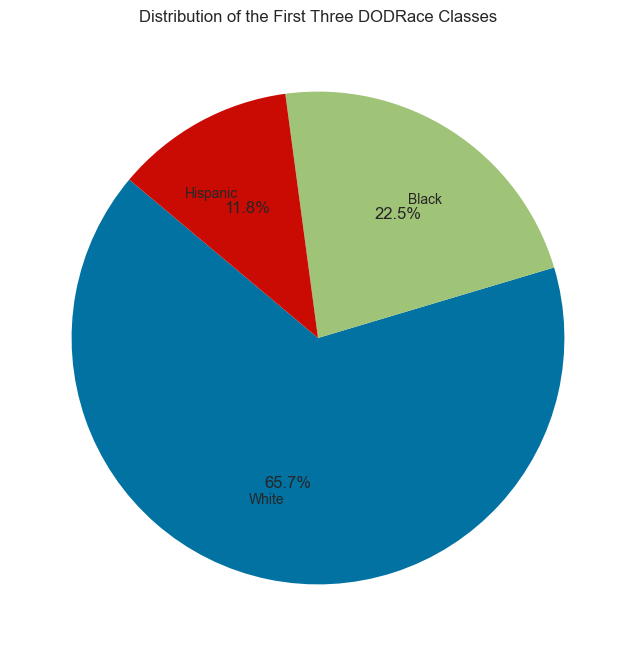

In [18]:
# Let's see our three race classes in a pie plot to understand their percentage in the soldier population.

# Map numeric labels to race names
race_names = {1: 'White', 2: 'Black', 3: 'Hispanic'}  

plt.figure(figsize=(8, 8))

plt.pie(df['DODRace'].value_counts(), 
        labels=[race_names[label] for label in df['DODRace'].value_counts().index], 
        autopct='%1.1f%%', 
        startangle=140, labeldistance=0.67)

plt.title('Distribution of the First Three DODRace Classes')
plt.show()

In [19]:
# Display column names in stacks of 10
for i in range(0, len(df.columns), 10):
    print(df.columns[i:i+10])  

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed'],
      dtype='object')
Index(['bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth',
       'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength'],
      dtype='object')
Index(['buttockpopliteallength', 'calfcircumference', 'cervicaleheight',
       'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion',
       'crotchlengthposterioromphalion'],
      dtype='object')
Index(['earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
 

In [20]:
# There are two columns referring to the weight of soldiers in two measure types, lb and kg: 'Weightlbs' and 'weightkg'. 
## We drop weightkg'

df.drop(["weightkg"], axis = 1, inplace=True) 

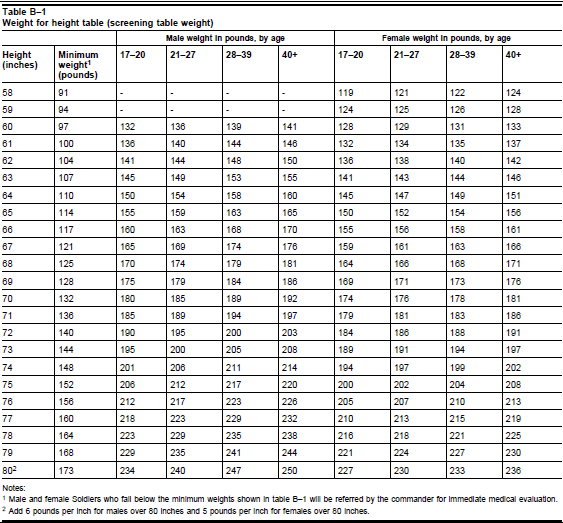 

**Height And Weight Requirements In The US Military:** 

**Army Height Requirement For Men**
The ideal height requirement for men in the military is between 60-80 inches / 152-203 cm. 

**Army Height Requirement For Women**
The military requires all women to be 58-80 inches / 147-203 cm. 

**Army Weight Requirement For Men**
The ideal weight requirement for men in the military is between 132 lbs / 247 lbs. 

**Army Weight Requirement For Women**
The military requires all women to be 119 lbs / 236 lbs. 

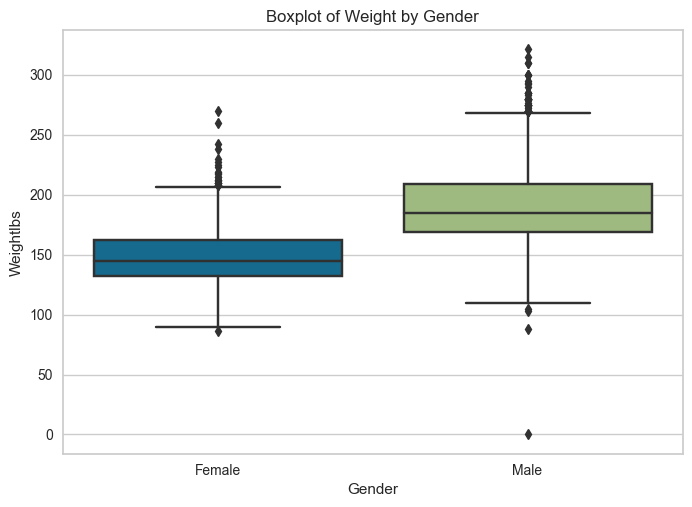

In [21]:
# Detecting Outliers in 'Weightlbs' using Seaborn Boxplot 

sns.boxplot(x='Gender', y='Weightlbs', data=df, order=['Female', 'Male'])
plt.title('Boxplot of Weight by Gender')
plt.show() 

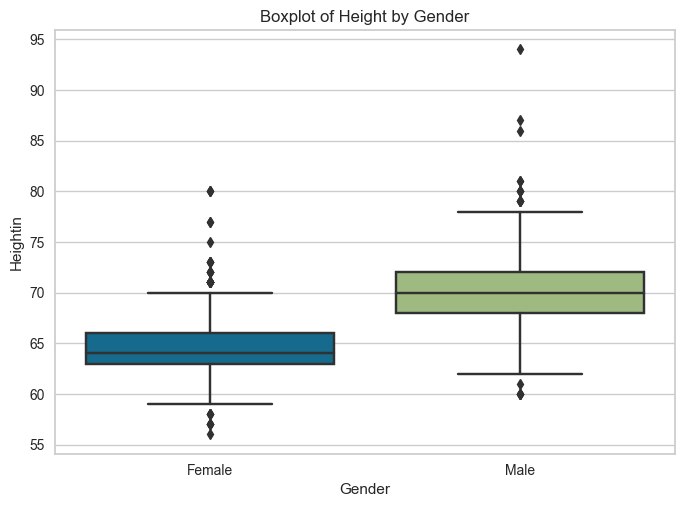

In [22]:
# Detecting Outliers in 'Heightin' using Seaborn Boxplot 

sns.boxplot(x='Gender', y='Heightin', data=df, order=['Female', 'Male'])
plt.title('Boxplot of Height by Gender')
plt.show() 

In [23]:
# According to US Navy Weight and Height Requirements, we drop outliers in the 'Weightlbs' feature. 

# Define outlier limits for 'Weightlbs':
female_limits = (119, 236)
male_limits = (132, 247)

# Create boolean masks for filtering
female_mask = (df['Gender'] == 'Female') & ((df['Weightlbs'] < female_limits[0]) | (df['Weightlbs'] > female_limits[1]))
male_mask = (df['Gender'] == 'Male') & ((df['Weightlbs'] < male_limits[0]) | (df['Weightlbs'] > male_limits[1]))

# Drop outliers
df = df[~(female_mask | male_mask)] 

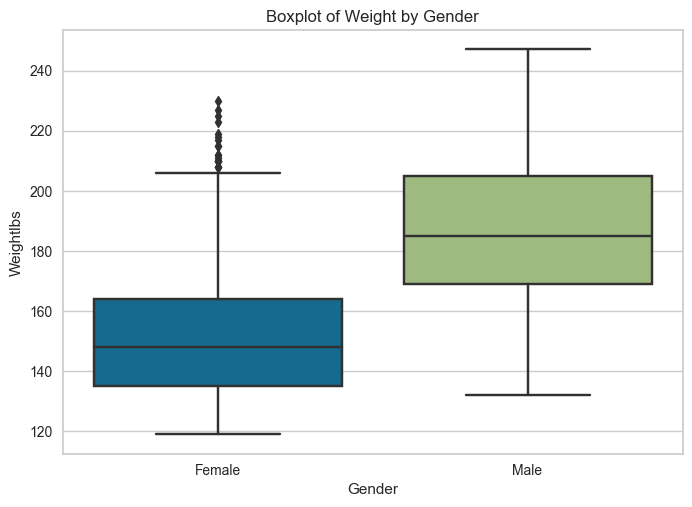

In [24]:
# Detecting Outliers in 'Weightlbs' using Seaborn Boxplot 

sns.boxplot(x='Gender', y='Weightlbs', data=df, order=['Female', 'Male'])
plt.title('Boxplot of Weight by Gender')
plt.show() 

In [25]:
# According to US Navy Weight and Height Requirements, we drop outliers in the 'Heightin' feature. 

# Define outlier limits for 'Heightin':
female_limits = (58, 80)
male_limits = (60, 80)

# Create boolean masks for filtering
female_mask = (df['Gender'] == 'Female') & ((df['Heightin'] < female_limits[0]) | (df['Heightin'] > female_limits[1]))
male_mask = (df['Gender'] == 'Male') & ((df['Heightin'] < male_limits[0]) | (df['Heightin'] > male_limits[1]))

# Drop outliers
df = df[~(female_mask | male_mask)]

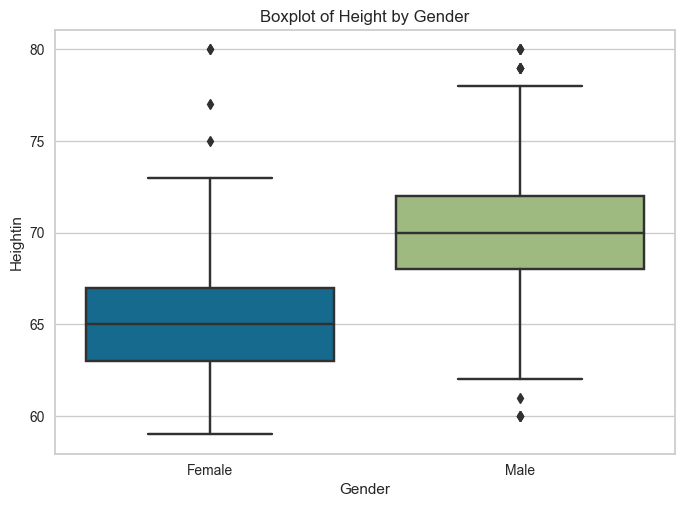

In [26]:
# Detecting Outliers in 'Heightin' using Seaborn Boxplot 

sns.boxplot(x='Gender', y='Heightin', data=df, order=['Female', 'Male'])
plt.title('Boxplot of Height by Gender')
plt.show() 

In [27]:
# Drop indexes
df.reset_index(drop=True, inplace=True) 

In [28]:
# Let's analyze object-type columns 

df.select_dtypes(exclude=[np.number]).head() 

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
0,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,Right hand
1,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,Right hand
2,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,Right hand
3,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,Right hand
4,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,Right hand


In [29]:
# Find the number of unique values in each object-type column

object_columns = df.select_dtypes(include='object').columns

for column in object_columns:
    unique_values_count = df[column].nunique()
    print(f"Column '{column}' has {unique_values_count} unique values.") 

Column 'Gender' has 2 unique values.
Column 'Date' has 253 unique values.
Column 'Installation' has 12 unique values.
Column 'Component' has 3 unique values.
Column 'Branch' has 3 unique values.
Column 'PrimaryMOS' has 280 unique values.
Column 'SubjectsBirthLocation' has 131 unique values.
Column 'WritingPreference' has 3 unique values.


In [30]:
# Encode the 'SubjectsBirthLocation' column using label encoding

label_encoder = LabelEncoder()

df['SubjectsBirthLocation_encoded'] = label_encoder.fit_transform(df['SubjectsBirthLocation'])

# Now, 'SubjectsBirthLocation_encoded' column will contain the encoded values 

In [31]:
# Encode the 'WritingPreference' column using label encoding

label_encoder = LabelEncoder()

df['WritingPreference_encoded'] = label_encoder.fit_transform(df['WritingPreference'])

# Now, 'WritingPreference_encoded' column will contain the encoded values 

In [32]:
# Drop encoded columns and some columns that give a little information about the soldier's race. 

drop_object_list = ['Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'WritingPreference']
df.drop(drop_object_list, axis=1, inplace=True) 

In [33]:
df.shape 

(5435, 100)

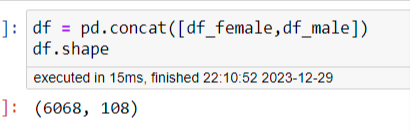 

In [34]:
# Let's analyze numeric columns 

df.select_dtypes(exclude=['object']).head() 

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,DODRace,Age,Heightin,Weightlbs,SubjectsBirthLocation_encoded,WritingPreference_encoded
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,152,756,2,26,61,142,38,2
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,155,815,3,21,64,120,16,2
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,162,799,1,23,68,147,114,2
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,173,818,2,22,66,175,28,2
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1572,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,152,762,1,45,63,195,114,2


In [35]:
# We drop the 'subjectid' column since it gives a unique number for each participant measured in the anthropometric survey.

df.drop("subjectid", axis = 1, inplace = True) 

**let's look at the correlational relations and then find our features that can be multicollinearity** 

Multicollinearity refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related.

In [36]:
def color_red(val):  
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}' 

In [37]:
pd.DataFrame(df).corr().style.applymap(color_red) 

In [38]:
# A function for dropping columns that have multicollinearity 

correlation_thresholds = [-0.90, 0.90]

# Compute the correlation matrix
correlation_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Find features with correlation outside the threshold range
to_drop = [column for column in upper_triangle.columns if any((upper_triangle[column] >= correlation_thresholds[1]) | (upper_triangle[column] <= correlation_thresholds[0]))]

# Drop the highly correlated features
df.drop(to_drop, axis=1, inplace=True) 

In [39]:
pd.DataFrame(df).corr().style.applymap(color_red)  

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,calfcircumference,chestbreadth,chestcircumference,chestdepth,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,forearmcircumferenceflexed,functionalleglength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,interpupillarybreadth,interscyei,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,overheadfingertipreachsitting,palmlength,shoulderlength,sleevelengthspinewrist,thighclearance,thumbtipreach,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistfrontlengthsitting,wristcircumference,DODRace,Age,Weightlbs,SubjectsBirthLocation_encoded,WritingPreference_encoded
abdominalextensiondepthsitting,1.000000,0.252416,0.218330,0.430385,0.368793,0.244159,0.334872,0.631800,0.430201,0.670709,0.280120,0.463015,0.570677,0.451268,0.685954,0.810254,0.154049,0.384922,0.588726,0.566416,0.791738,0.740183,0.384802,0.129990,0.206798,0.362818,0.121124,0.219209,0.187209,0.256176,0.558533,0.323289,0.342848,0.211872,0.300780,0.289299,0.258896,0.412622,0.365984,0.214878,0.545472,0.273443,0.607186,0.230072,0.601883,0.223798,0.227577,0.122732,0.329299,0.668274,0.309448,0.136414,0.672450,0.508328,0.832049,0.526039,0.467634,-0.023935,0.404132,0.746815,-0.006254,0.011021
acromialheight,0.252416,1.000000,0.854446,0.437423,0.658987,0.779244,0.705027,0.450723,0.323460,0.570896,0.676395,0.519199,0.532343,0.452693,0.159755,0.231543,0.857081,0.786486,0.317680,0.477965,0.454224,0.168022,0.263978,0.370046,0.335725,0.404371,0.263909,0.261746,0.796879,0.831020,0.583387,0.883036,0.678177,0.730364,0.357670,0.378743,0.512553,0.771559,0.391007,0.306266,0.470322,0.652735,0.218156,0.510133,0.580113,0.852747,0.684204,0.518950,0.856845,0.357836,0.784973,0.295176,0.694882,0.698349,0.346556,0.559205,0.699484,-0.226082,0.054973,0.660690,-0.000390,-0.013031
acromionradialelength,0.218330,0.854446,1.000000,0.344621,0.565412,0.702791,0.634864,0.378252,0.263569,0.499571,0.580830,0.468361,0.459370,0.401909,0.129965,0.184378,0.798254,0.748152,0.265775,0.400780,0.393418,0.159093,0.168288,0.264180,0.286179,0.333565,0.218584,-0.052619,0.607807,0.800959,0.500819,0.801788,0.587685,0.697502,0.304623,0.339444,0.446918,0.677553,0.387786,0.309385,0.412561,0.522181,0.180563,0.443155,0.494493,0.770907,0.640547,0.489536,0.857619,0.292154,0.782960,0.260084,0.525200,0.568396,0.280843,0.425090,0.602325,-0.159980,0.057136,0.569173,0.007500,-0.014449
anklecircumference,0.430385,0.437423,0.344621,1.000000,0.668163,0.511908,0.477718,0.570320,0.369324,0.572829,0.656088,0.455243,0.463095,0.436837,0.479166,0.493478,0.291195,0.423231,0.783540,0.487996,0.536581,0.393852,0.390265,0.331836,0.179815,0.320511,0.223542,0.270506,0.458244,0.385547,0.602131,0.447509,0.523461,0.393272,0.352086,0.369994,0.382928,0.686768,0.472045,0.199653,0.446508,0.435391,0.638419,0.352696,0.509935,0.440959,0.392917,0.310081,0.478765,0.582018,0.394972,0.258339,0.601886,0.445115,0.503392,0.413476,0.648778,-0.164707,-0.060591,0.676094,0.021646,-0.016703
balloffootcircumference,0.368793,0.658987,0.565412,0.668163,1.000000,0.720604,0.708838,0.611849,0.241463,0.672081,0.778275,0.616831,0.610922,0.572631,0.245187,0.370275,0.506927,0.526165,0.557768,0.524959,0.568390,0.273807,0.244228,0.310357,0.354500,0.435472,0.304880,0.217742,0.618133,0.642115,0.719650,0.626483,0.805141,0.622653,0.469044,0.458107,0.553308,0.845089,0.593265,0.347281,0.558430,0.616163,0.398589,0.538550,0.695912,0.649585,0.586754,0.506181,0.719545,0.500681,0.606407,0.311607,0.628265,0.600731,0.424561,0.497204,0.805744,-0

In [40]:
df.shape 

(5435, 63)

**!!!!!**

**Since the numerical values of the target variable may lead models to make mistakes in the weightings,**

**We convert the 'DODRace' value type, which is the target column of our model, into categorical.**   

**!!!!**

In [41]:
# Define the custom mapping
DODRace_mapping = {1: 0, 2: 1, 3: 2}

# Replace values in the 'DODRace' column with encoded values
df['DODRace'] = df['DODRace'].map(DODRace_mapping)

# Display unique values in the modified 'DODRace' column
print("Modified values:", df['DODRace'].unique()) 

Modified values: [1 2 0]


In [42]:
df.DODRace.value_counts() 

0    3581
1    1211
2     643
Name: DODRace, dtype: int64

------------------------------

**An Important Recommendation from Researcher:**  

The ANSUR II working databases are presented as two separate databases – one Female, one
Male. In almost all cases, these databases should be treated and analyzed separately.
Combination of the databases will result in a sample that is not representative of any real
population and could easily lead to erroneous conclusions. 

-----------------------------------------

**As recommended above, we split our data into 'Female' and 'Male' data sets and make predictions using these two data sets separately.** 

In [43]:
# Split the concatenated DataFrame into Female and Male DataFrames
df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']

# Display the resulting DataFrames
print("Female DataFrame:")
print(df_female)

print("\nMale DataFrame:")
print(df_male)

Female DataFrame:
      abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                231            1282                    301   
1                                194            1379                    320   
2                                183            1369                    329   
3                                261            1356                    306   
4                                309            1303                    308   
...                              ...             ...                    ...   
1718                             285            1392                    335   
1719                             262            1324                    301   
1720                             260            1334                    318   
1721                             205            1293                    302   
1722                             238            1346                    308   

      anklecircumference  balloff

In [44]:
df_female.Gender.unique() 

array(['Female'], dtype=object)

In [45]:
df_male.Gender.unique() 

array(['Male'], dtype=object)

**Now, we drop the 'Gender' columns in the Female and Male data sets since they no longer provide information that affects the target variable.**  

In [46]:
df_female.drop("Gender", axis = 1, inplace = True) 

In [47]:
df_male.drop("Gender", axis = 1, inplace = True) 

In [48]:
# Before Data Preprocessing we save our new data sets

# Create copies of the DataFrames
female = df_female.copy() 
male = df_male.copy()

# Save the DataFrames to CSV files 
female.to_csv("female_EDA.csv", index = False)
male.to_csv("male_EDA.csv", index = False) 

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [2]:
# Read the new 'Female' and 'Male' data sets 

df_female = pd.read_csv('female_EDA.csv')
df_male = pd.read_csv('male_EDA.csv') 

In [3]:
# Labelling the variables of the model

X_f = df_female.drop("DODRace",axis=1)
X_m = df_male.drop("DODRace",axis=1)

y_f= df_female.DODRace 
y_m= df_male.DODRace 

In [4]:
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size=0.2, random_state=42, stratify =y_f)

X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.2, random_state=42, stratify =y_m) 

In [5]:
scaler =StandardScaler()

X_f_train = scaler.fit_transform(X_f_train)
X_f_test = scaler.transform(X_f_test)

X_m_train = scaler.fit_transform(X_m_train)
X_m_test = scaler.transform(X_m_test) 

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [6]:
# First we build a Logistic model for the Female data set 

log_female = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42)

log_female.fit(X_f_train,y_f_train)

y_f_pred = log_female.predict(X_f_test) 

In [7]:
log_female_precision = precision_score(y_f_test, y_f_pred, average=None)
log_female_recall = recall_score(y_f_test, y_f_pred, average=None)
log_female_f1 = f1_score(y_f_test, y_f_pred, average=None) 

In [8]:
log_female_macro_precision = np.mean(log_female_precision)
log_female_macro_recall = np.mean(log_female_recall)
log_female_macro_f1 = np.mean(log_female_f1) 

In [9]:
print("Macro F1 Score:", log_female_macro_f1)

Macro F1 Score: 0.7831284894910345


In [10]:
# A function for evaluating our model performance

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [11]:
# Evaluation Metrics for Female Data Set using Vanilla Log Model

eval_metric(log_female, X_f_train, y_f_train, X_f_test, y_f_test) 

Test_Set
[[150   6  23]
 [  5 111   6]
 [  9   6  29]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       179
           1       0.90      0.91      0.91       122
           2       0.50      0.66      0.57        44

    accuracy                           0.84       345
   macro avg       0.77      0.80      0.78       345
weighted avg       0.86      0.84      0.85       345


Train_Set
[[595  16 104]
 [  9 445  33]
 [ 23  11 142]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       715
           1       0.94      0.91      0.93       487
           2       0.51      0.81      0.62       176

    accuracy                           0.86      1378
   macro avg       0.80      0.85      0.81      1378
weighted avg       0.89      0.86      0.87      1378



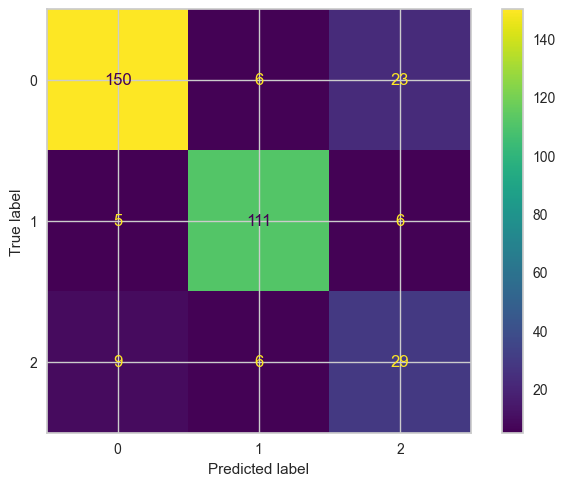

In [12]:
plot_confusion_matrix(log_female, X_f_test, y_f_test); 

In [13]:
# Now we build a Logistic model for the Male data set 

log_male = LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42)

log_male.fit(X_m_train,y_m_train)

y_m_pred = log_male.predict(X_m_test) 

In [14]:
log_male_precision = precision_score(y_m_test, y_m_pred, average=None)
log_male_recall = recall_score(y_m_test, y_m_pred, average=None)
log_male_f1 = f1_score(y_m_test, y_m_pred, average=None) 

In [15]:
log_male_macro_precision = np.mean(log_male_precision)
log_male_macro_recall = np.mean(log_male_recall)
log_male_macro_f1 = np.mean(log_male_f1) 

In [16]:
print("Macro F1 Score:", log_male_macro_f1)

Macro F1 Score: 0.7042248138354078


In [17]:
# Evaluation Metrics for Male Data Set using Vanilla Log Model

eval_metric(log_male, X_m_train, y_m_train, X_m_test, y_m_test) 

Test_Set
[[397  22 119]
 [  3 114   3]
 [ 19  10  56]]
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       538
           1       0.78      0.95      0.86       120
           2       0.31      0.66      0.43        85

    accuracy                           0.76       743
   macro avg       0.68      0.78      0.70       743
weighted avg       0.85      0.76      0.79       743


Train_Set
[[1676   60  413]
 [  14  443   25]
 [  68   27  243]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2149
           1       0.84      0.92      0.88       482
           2       0.36      0.72      0.48       338

    accuracy                           0.80      2969
   macro avg       0.72      0.81      0.74      2969
weighted avg       0.87      0.80      0.82      2969



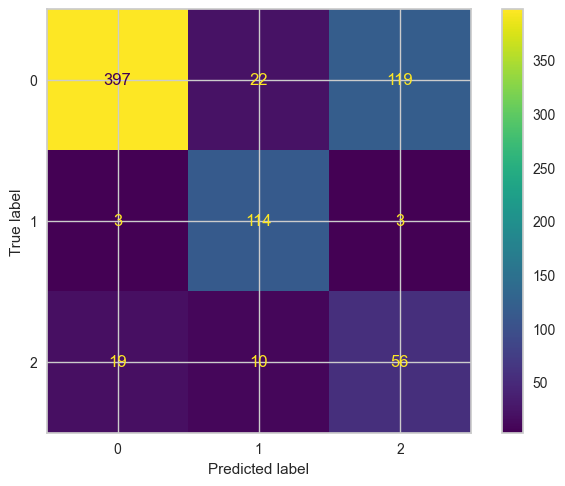

In [18]:
plot_confusion_matrix(log_male, X_m_test, y_m_test); 

### Logistic Model GridsearchCV

**Since The vanilla Logistic model struggles to find the Hispanic Class, let's make Grid Search and tune some hyperparameters to get better scores.** 

In [19]:
model = LogisticRegression()


#penalty = ["l1","l2"]
C = np.logspace(-1, 5, 20) 
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
#solver = ["lbfgs","liblinear"] 

param_grid = {
              #"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              #"solver":solver
}

In [20]:
# First we build a Logistic Grid model for the Female data set 


log_grid_female = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'f1_macro', 
                          n_jobs = -1) 

log_grid_female.fit(X_f_train,y_f_train) 

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None]},
             scoring='f1_macro')

In [21]:
log_grid_female.best_params_ 

{'C': 7.847599703514611, 'class_weight': None}

In [22]:
log_grid_female_precision = precision_score(y_f_test, y_f_pred, average=None)
log_grid_female_recall = recall_score(y_f_test, y_f_pred, average=None)
log_grid_female_f1 = f1_score(y_f_test, y_f_pred, average=None) 

In [23]:
log_grid_female_macro_precision = np.mean(log_grid_female_precision)
log_grid_female_macro_recall = np.mean(log_grid_female_recall)
log_grid_female_macro_f1 = np.mean(log_grid_female_f1) 

In [24]:
print("Macro F1 Score:", log_grid_female_macro_f1)

Macro F1 Score: 0.7831284894910345


In [25]:
# Evaluation Metrics for Female Data Set using GridSearch for Log Model 

eval_metric(log_grid_female, X_f_train, y_f_train, X_f_test, y_f_test) 

Test_Set
[[166   5   8]
 [  5 114   3]
 [ 14   8  22]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       179
           1       0.90      0.93      0.92       122
           2       0.67      0.50      0.57        44

    accuracy                           0.88       345
   macro avg       0.82      0.79      0.80       345
weighted avg       0.87      0.88      0.87       345


Train_Set
[[678  11  26]
 [ 15 461  11]
 [ 64  18  94]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       715
           1       0.94      0.95      0.94       487
           2       0.72      0.53      0.61       176

    accuracy                           0.89      1378
   macro avg       0.85      0.81      0.83      1378
weighted avg       0.89      0.89      0.89      1378



In [26]:
# Now we build a Logistic Grid model for the Male data set 

log_grid_male = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'f1_macro', 
                          n_jobs = -1) 

log_grid_male.fit(X_m_train,y_m_train) 

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None]},
             scoring='f1_macro')

In [27]:
log_grid_male.best_params_ 

{'C': 0.42813323987193935, 'class_weight': None}

In [28]:
log_grid_male_precision = precision_score(y_m_test, y_m_pred, average=None)
log_grid_male_recall = recall_score(y_m_test, y_m_pred, average=None)
log_grid_male_f1 = f1_score(y_m_test, y_m_pred, average=None) 

In [29]:
log_grid_male_macro_precision = np.mean(log_grid_male_precision)
log_grid_male_macro_recall = np.mean(log_grid_male_recall)
log_grid_male_macro_f1 = np.mean(log_grid_male_f1) 

In [30]:
print("Macro F1 Score:", log_grid_male_macro_f1)

Macro F1 Score: 0.7042248138354078


In [31]:
# Evaluation Metrics for Male Data Set using GridSearch for Log Model 

eval_metric(log_grid_male, X_m_train, y_m_train, X_m_test, y_m_test) 

Test_Set
[[515  12  11]
 [  6 113   1]
 [ 46   9  30]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       538
           1       0.84      0.94      0.89       120
           2       0.71      0.35      0.47        85

    accuracy                           0.89       743
   macro avg       0.82      0.75      0.76       743
weighted avg       0.88      0.89      0.87       743


Train_Set
[[2087   17   45]
 [  39  433   10]
 [ 196   27  115]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2149
           1       0.91      0.90      0.90       482
           2       0.68      0.34      0.45       338

    accuracy                           0.89      2969
   macro avg       0.83      0.74      0.76      2969
weighted avg       0.87      0.89      0.87      2969



## Lojistic Regression solver "liblenear" for small dataset

**We get better scores for the Hispanic class when using the solver `"lbfgs"` in the Female Data set, but there is no difference for the Hispanic class in the Male Data set.**   

**Let's try the solver `"liblenear"`.** 

In [32]:
model = LogisticRegression()


penalty = ["l2"]
C = np.logspace(-1, 5, 20) 
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["liblinear"] 

param_grid = {
              "penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver
}

In [33]:
# First we build a Logistic Grid model for the Female data set 

log_grid_f_liblinear = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'f1_macro', 
                          n_jobs = -1) 

log_grid_f_liblinear.fit(X_f_train,y_f_train) 

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='f1_macro')

In [34]:
log_grid_f_liblinear.best_params_ 

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

In [35]:
log_grid_f_liblinear_precision = precision_score(y_f_test, y_f_pred, average=None)
log_grid_f_liblinear_recall = recall_score(y_f_test, y_f_pred, average=None)
log_grid_f_liblinear_f1 = f1_score(y_f_test, y_f_pred, average=None) 

In [36]:
log_grid_f_liblinear_macro_precision = np.mean(log_grid_f_liblinear_precision)
log_grid_f_liblinear_macro_recall = np.mean(log_grid_f_liblinear_recall)
log_grid_f_liblinear_macro_f1 = np.mean(log_grid_f_liblinear_f1) 

In [37]:
print("Macro F1 Score:", log_grid_f_liblinear_macro_f1)

Macro F1 Score: 0.7831284894910345


In [38]:
# Evaluation Metrics for Female Data Set using GridSearch for Log Model 

eval_metric(log_grid_f_liblinear, X_f_train, y_f_train, X_f_test, y_f_test) 

Test_Set
[[159   6  14]
 [  3 117   2]
 [ 13   7  24]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       179
           1       0.90      0.96      0.93       122
           2       0.60      0.55      0.57        44

    accuracy                           0.87       345
   macro avg       0.80      0.80      0.80       345
weighted avg       0.87      0.87      0.87       345


Train_Set
[[665  18  32]
 [ 15 461  11]
 [ 57  20  99]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       715
           1       0.92      0.95      0.94       487
           2       0.70      0.56      0.62       176

    accuracy                           0.89      1378
   macro avg       0.84      0.81      0.82      1378
weighted avg       0.88      0.89      0.89      1378



In [39]:
# Now we build a Logistic Grid model for the Male data set 

log_grid_m_liblinear = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'f1_macro', 
                          n_jobs = -1) 

log_grid_m_liblinear.fit(X_m_train,y_m_train) 

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='f1_macro')

In [40]:
log_grid_m_liblinear.best_params_ 

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

In [41]:
log_grid_m_liblinear_precision = precision_score(y_m_test, y_m_pred, average=None)
log_grid_m_liblinear_recall = recall_score(y_m_test, y_m_pred, average=None)
log_grid_m_liblinear_f1 = f1_score(y_m_test, y_m_pred, average=None) 

In [42]:
log_grid_m_liblinear_macro_precision = np.mean(log_grid_m_liblinear_precision)
log_grid_m_liblinear_macro_recall = np.mean(log_grid_m_liblinear_recall)
log_grid_m_liblinear_macro_f1 = np.mean(log_grid_m_liblinear_f1) 

In [43]:
print("Macro F1 Score:", log_grid_m_liblinear_macro_f1)

Macro F1 Score: 0.7042248138354078


In [44]:
# Evaluation Metrics for Male Data Set using GridSearch for Log Model 

eval_metric(log_grid_m_liblinear, X_m_train, y_m_train, X_m_test, y_m_test) 

Test_Set
[[489  20  29]
 [  4 115   1]
 [ 32  10  43]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       538
           1       0.79      0.96      0.87       120
           2       0.59      0.51      0.54        85

    accuracy                           0.87       743
   macro avg       0.77      0.79      0.78       743
weighted avg       0.87      0.87      0.87       743


Train_Set
[[1959   55  135]
 [  24  445   13]
 [ 134   34  170]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2149
           1       0.83      0.92      0.88       482
           2       0.53      0.50      0.52       338

    accuracy                           0.87      2969
   macro avg       0.76      0.78      0.77      2969
weighted avg       0.87      0.87      0.87      2969



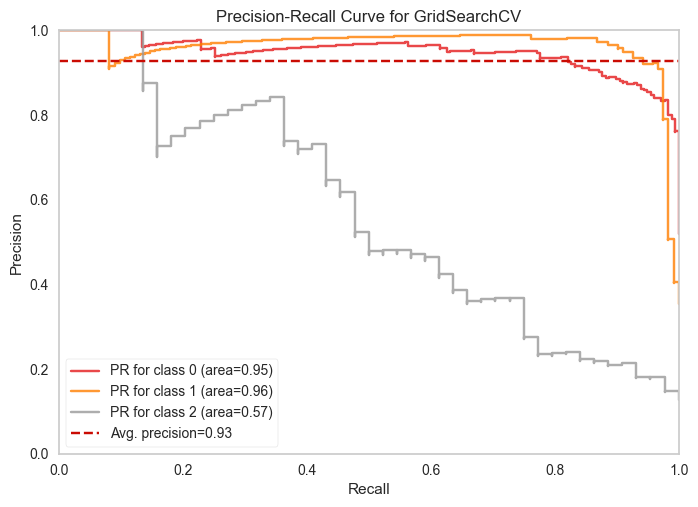

In [67]:
# For Female Data

model = log_grid_f_liblinear

viz = PrecisionRecallCurve(
    model,
    per_class=True, #To plot three classes
    cmap="Set1"
)
viz.fit(X_f_train, y_f_train)
viz.score(X_f_test, y_f_test)
viz.show(); 

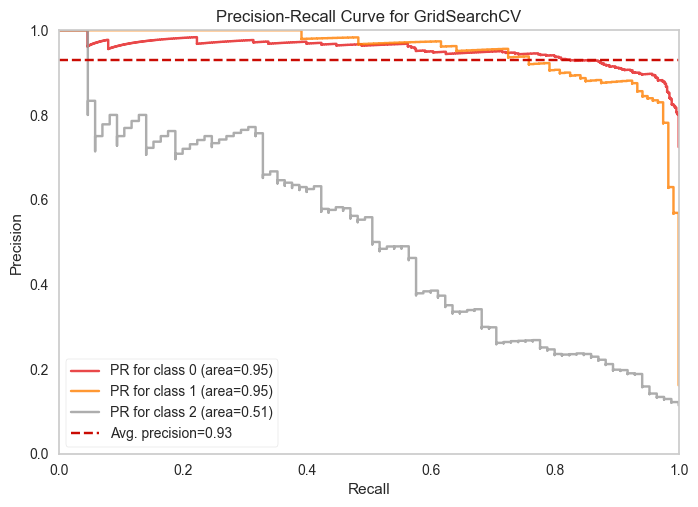

In [68]:
# For Male Data

model = log_grid_m_liblinear

viz = PrecisionRecallCurve(
    model,
    per_class=True, #To plot three classes
    cmap="Set1"
)
viz.fit(X_m_train, y_m_train)
viz.score(X_m_test, y_m_test)
viz.show(); 

## 2. SVC 

### Vanilla SVC model 

If the hyperplane classifies the dataset linearly then the algorithm we call it as SVC and the algorithm that separates the dataset by non-linear approach then we call it as SVM. 

In [69]:
# First we build a SVC model for the Female data set 

svm_female = SVC(class_weight='balanced')

svm_female.fit(X_f_train, y_f_train)
y_f_pred = svm_female.predict(X_f_test) 

In [70]:
svm_female_precision = precision_score(y_f_test, y_f_pred, average=None)
svm_female_recall = recall_score(y_f_test, y_f_pred, average=None)
svm_female_f1 = f1_score(y_f_test, y_f_pred, average=None) 

In [71]:
svm_female_macro_precision = np.mean(svm_female_precision)
svm_female_macro_recall = np.mean(svm_female_recall)
svm_female_macro_f1 = np.mean(svm_female_f1) 

In [72]:
print("Macro F1 Score:", svm_female_macro_f1)

Macro F1 Score: 0.7999953275394823


In [73]:
# Evaluation Metrics for Female Data Set using SVC Model 

eval_metric(svm_female, X_f_train, y_f_train, X_f_test, y_f_test) 

Test_Set
[[152   3  24]
 [  6 116   0]
 [ 11   5  28]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       179
           1       0.94      0.95      0.94       122
           2       0.54      0.64      0.58        44

    accuracy                           0.86       345
   macro avg       0.79      0.81      0.80       345
weighted avg       0.87      0.86      0.86       345


Train_Set
[[665   7  43]
 [ 11 462  14]
 [  8   2 166]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       715
           1       0.98      0.95      0.96       487
           2       0.74      0.94      0.83       176

    accuracy                           0.94      1378
   macro avg       0.90      0.94      0.92      1378
weighted avg       0.95      0.94      0.94      1378



In [74]:
# Now we build a SVC model for the Male data set 
svm_male = SVC(class_weight='balanced')

svm_male.fit(X_m_train, y_m_train)
y_m_pred = svm_male.predict(X_m_test) 

In [75]:
svm_male_precision = precision_score(y_m_test, y_m_pred, average=None)
svm_male_recall = recall_score(y_m_test, y_m_pred, average=None)
svm_male_f1 = f1_score(y_m_test, y_m_pred, average=None) 

In [76]:
svm_male_macro_precision = np.mean(svm_male_precision)
svm_male_macro_recall = np.mean(svm_male_recall)
svm_male_macro_f1 = np.mean(svm_male_f1) 

In [77]:
print("Macro F1 Score:", svm_male_macro_f1)

Macro F1 Score: 0.7527742701858994


In [78]:
# Evaluation Metrics for Male Data Set using SVC Model 

eval_metric(svm_male, X_m_train, y_m_train, X_m_test, y_m_test) 

Test_Set
[[452  15  71]
 [  3 117   0]
 [ 26  10  49]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       538
           1       0.82      0.97      0.89       120
           2       0.41      0.58      0.48        85

    accuracy                           0.83       743
   macro avg       0.72      0.80      0.75       743
weighted avg       0.86      0.83      0.84       743


Train_Set
[[1892   28  229]
 [  12  467    3]
 [  23    6  309]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2149
           1       0.93      0.97      0.95       482
           2       0.57      0.91      0.70       338

    accuracy                           0.90      2969
   macro avg       0.83      0.92      0.86      2969
weighted avg       0.93      0.90      0.91      2969



###  SVC Model GridsearchCV

**Let's make Grid Search and tune some hyperparameters to get better scores.** 

In [79]:
param_grid = {"C":np.linspace(0.01,1,3),
             "gamma":[0.1, 0.3, 0.5, 0.9],
             "kernel":["rbf", "linear"]}

In [80]:
model = SVC(class_weight="balanced") 

In [81]:
svm_f_grid = GridSearchCV(model, param_grid, scoring='f1_macro', n_jobs=-1)

In [82]:
# First we build a SVC model with GridSearch for the Female data set 

svm_f_grid.fit(X_f_train, y_f_train)
y_f_pred = svm_f_grid.predict(X_f_test) 

In [83]:
svm_f_grid.best_params_ 

{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}

In [84]:
svm_f_grid_precision = precision_score(y_f_test, y_f_pred, average=None)
svm_f_grid_recall = recall_score(y_f_test, y_f_pred, average=None)
svm_f_grid_f1 = f1_score(y_f_test, y_f_pred, average=None) 

In [85]:
svm_f_grid_macro_precision = np.mean(svm_f_grid_precision)
svm_f_grid_macro_recall = np.mean(svm_f_grid_recall)
svm_f_grid_macro_f1 = np.mean(svm_f_grid_f1) 

In [86]:
print("Macro F1 Score:", svm_f_grid_macro_f1)

Macro F1 Score: 0.789719721171919


In [87]:
# Evaluation Metrics for Female Data Set using SVC Model with GridSearch

eval_metric(svm_f_grid, X_f_train, y_f_train, X_f_test, y_f_test) 

Test_Set
[[143   5  31]
 [  4 113   5]
 [  7   4  33]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       179
           1       0.93      0.93      0.93       122
           2       0.48      0.75      0.58        44

    accuracy                           0.84       345
   macro avg       0.78      0.83      0.79       345
weighted avg       0.87      0.84      0.85       345


Train_Set
[[606  14  95]
 [ 12 442  33]
 [ 30  16 130]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       715
           1       0.94      0.91      0.92       487
           2       0.50      0.74      0.60       176

    accuracy                           0.85      1378
   macro avg       0.79      0.83      0.80      1378
weighted avg       0.88      0.85      0.86      1378



In [88]:
# Now we build a SVC model with GridSearch for the Male data set 

svm_m_grid = GridSearchCV(model, param_grid, scoring='f1_macro', n_jobs=-1)

svm_m_grid.fit(X_m_train, y_m_train)
y_m_pred = svm_m_grid.predict(X_m_test) 

In [89]:
svm_m_grid.best_params_ 

{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}

In [90]:
svm_m_grid_precision = precision_score(y_m_test, y_m_pred, average=None)
svm_m_grid_recall = recall_score(y_m_test, y_m_pred, average=None)
svm_m_grid_f1 = f1_score(y_m_test, y_m_pred, average=None) 

In [91]:
svm_m_grid_macro_precision = np.mean(svm_m_grid_precision)
svm_m_grid_macro_recall = np.mean(svm_m_grid_recall)
svm_m_grid_macro_f1 = np.mean(svm_m_grid_f1) 

In [92]:
print("Macro F1 Score:", svm_m_grid_macro_f1) 

Macro F1 Score: 0.7174549244532685


In [93]:
# Evaluation Metrics for Male Data Set using SVC Model with GridSearch

eval_metric(svm_m_grid, X_m_train, y_m_train, X_m_test, y_m_test) 

Test_Set
[[406  17 115]
 [  2 115   3]
 [ 23   7  55]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       538
           1       0.83      0.96      0.89       120
           2       0.32      0.65      0.43        85

    accuracy                           0.78       743
   macro avg       0.70      0.79      0.72       743
weighted avg       0.85      0.78      0.80       743


Train_Set
[[1688   53  408]
 [  14  444   24]
 [  69   31  238]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      2149
           1       0.84      0.92      0.88       482
           2       0.36      0.70      0.47       338

    accuracy                           0.80      2969
   macro avg       0.72      0.80      0.74      2969
weighted avg       0.87      0.80      0.82      2969



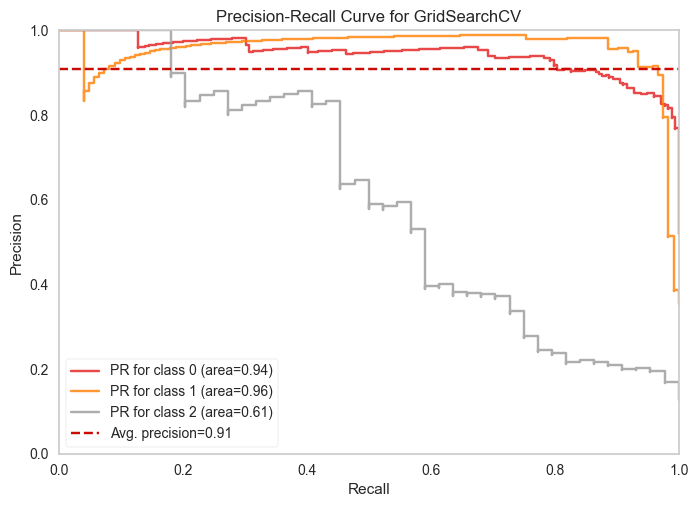

In [94]:
# For Female Data

model = svm_f_grid

viz = PrecisionRecallCurve(
    model,
    per_class=True, #To plot three classes
    cmap="Set1"
)
viz.fit(X_f_train, y_f_train)
viz.score(X_f_test, y_f_test)
viz.show(); 

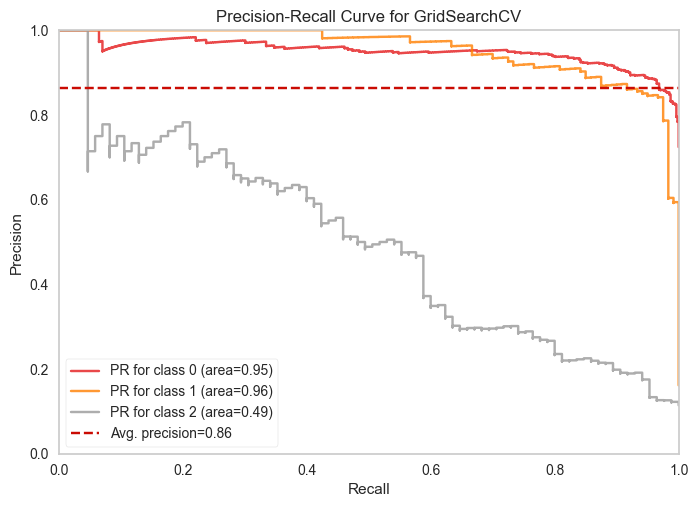

In [95]:
# For Male Data

model = svm_m_grid

viz = PrecisionRecallCurve(
    model,
    per_class=True, #To plot three classes
    cmap="Set1"
)
viz.fit(X_m_train, y_m_train)
viz.score(X_m_test, y_m_test)
viz.show(); 

## 3. RF

### Vanilla RF Model

In [96]:
# Read the new 'Female' and 'Male' data sets 

df_female = pd.read_csv('female_EDA.csv')
df_male = pd.read_csv('male_EDA.csv') 

In [97]:
# Labelling the variables of the model

X_f = df_female.drop("DODRace",axis=1)
X_m = df_male.drop("DODRace",axis=1)

y_f= df_female.DODRace 
y_m= df_male.DODRace 

In [98]:
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size=0.2, random_state=42, stratify =y_f)

X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.2, random_state=42, stratify =y_m) 

**Random Forest is a tree-based model and hence does not require feature scaling.** 

In [99]:
# First we build a Random Forest model for the Female data set 

rf_female = RandomForestClassifier(class_weight = "balanced", random_state = 42)
rf_female.fit(X_f_train, y_f_train) 

RandomForestClassifier(class_weight='balanced', random_state=42)

In [100]:
y_f_pred = rf_female.predict(X_f_test) 

In [101]:
# A function for evaluating our model performance

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred)) 

In [102]:
rf_female_precision = precision_score(y_f_test, y_f_pred, average=None)
rf_female_recall = recall_score(y_f_test, y_f_pred, average=None)
rf_female_f1 = f1_score(y_f_test, y_f_pred, average=None) 

In [103]:
rf_female_macro_precision = np.mean(rf_female_precision)
rf_female_macro_recall = np.mean(rf_female_recall)
rf_female_macro_f1 = np.mean(rf_female_f1) 

In [104]:
print("Macro F1 Score:", rf_female_macro_f1)

Macro F1 Score: 0.6308043117744611


In [105]:
# Evaluation Metrics for Female Data Set using Random Forest

eval_metric(rf_female, X_f_train, y_f_train, X_f_test, y_f_test) 

Test_Set
[[171   8   0]
 [ 17 105   0]
 [ 35   5   4]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       179
           1       0.89      0.86      0.88       122
           2       1.00      0.09      0.17        44

    accuracy                           0.81       345
   macro avg       0.89      0.64      0.63       345
weighted avg       0.84      0.81      0.77       345


Train_Set
[[715   0   0]
 [  0 487   0]
 [  0   0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       715
           1       1.00      1.00      1.00       487
           2       1.00      1.00      1.00       176

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378



In [106]:
# Now we build a Random Forest model for the Male data set 

rf_male = RandomForestClassifier(class_weight = "balanced", random_state = 42)
rf_male.fit(X_m_train, y_m_train) 

RandomForestClassifier(class_weight='balanced', random_state=42)

In [107]:
y_m_pred = rf_male.predict(X_m_test) 

In [108]:
rf_male_precision = precision_score(y_m_test, y_m_pred, average=None)
rf_male_recall = recall_score(y_m_test, y_m_pred, average=None)
rf_male_f1 = f1_score(y_m_test, y_m_pred, average=None) 

In [109]:
rf_male_macro_precision = np.mean(rf_male_precision)
rf_male_macro_recall = np.mean(rf_male_recall)
rf_male_macro_f1 = np.mean(rf_male_f1) 

In [110]:
print("Macro F1 Score:", rf_male_macro_f1) 

Macro F1 Score: 0.58051393223025


In [111]:
# Evaluation Metrics for Male Data Set using Random Forest

eval_metric(rf_male, X_m_train, y_m_train, X_m_test, y_m_test) 

Test_Set
[[536   2   0]
 [ 45  75   0]
 [ 80   1   4]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       538
           1       0.96      0.62      0.76       120
           2       1.00      0.05      0.09        85

    accuracy                           0.83       743
   macro avg       0.92      0.56      0.58       743
weighted avg       0.86      0.83      0.78       743


Train_Set
[[2149    0    0]
 [   0  482    0]
 [   0    0  338]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       1.00      1.00      1.00       482
           2       1.00      1.00      1.00       338

    accuracy                           1.00      2969
   macro avg       1.00      1.00      1.00      2969
weighted avg       1.00      1.00      1.00      2969



### RF Model GridsearchCV

In [112]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     
             'max_features':[2, 3, 5, "auto"],
             'max_depth':[1, 2, 3, 5],
             'min_samples_split':[2, 5, 8]}

In [113]:
# First we build a Random Forest model with GridSearch for the Female data set 

model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_f_grid = GridSearchCV(model, 
                             param_grid,
                             scoring = 'f1_macro',
                             n_jobs = -1,
                             verbose = 2).fit(X_f_train, y_f_train) 

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [114]:
rf_f_grid.best_params_ 

{'max_depth': 5,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 300}

In [115]:
rf_f_grid_precision = precision_score(y_f_test, y_f_pred, average=None)
rf_f_grid_recall = recall_score(y_f_test, y_f_pred, average=None)
rf_f_grid_f1 = f1_score(y_f_test, y_f_pred, average=None) 

In [116]:
rf_f_grid_macro_precision = np.mean(rf_f_grid_precision)
rf_f_grid_macro_recall = np.mean(rf_f_grid_recall)
rf_f_grid_macro_f1 = np.mean(rf_f_grid_f1) 

In [117]:
print("Macro F1 Score:", rf_f_grid_macro_f1) 

Macro F1 Score: 0.6308043117744611


In [118]:
eval_metric(rf_f_grid, X_f_train, y_f_train, X_f_test, y_f_test) 

Test_Set
[[140  21  18]
 [  8 107   7]
 [ 12   4  28]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       179
           1       0.81      0.88      0.84       122
           2       0.53      0.64      0.58        44

    accuracy                           0.80       345
   macro avg       0.74      0.77      0.75       345
weighted avg       0.81      0.80      0.80       345


Train_Set
[[628  30  57]
 [ 20 446  21]
 [ 28  14 134]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       715
           1       0.91      0.92      0.91       487
           2       0.63      0.76      0.69       176

    accuracy                           0.88      1378
   macro avg       0.82      0.85      0.84      1378
weighted avg       0.88      0.88      0.88      1378



In [119]:
# Now we build a Random Forest model with GridSearch for the Male data set 


model = RandomForestClassifier(class_weight = "balanced", random_state= 42)
rf_m_grid = GridSearchCV(model, 
                             param_grid,
                             scoring = 'f1_macro',
                             n_jobs = -1,
                             verbose = 2).fit(X_m_train, y_m_train) 

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [120]:
rf_m_grid.best_params_ 

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 300}

In [121]:
rf_m_grid_precision = precision_score(y_m_test, y_m_pred, average=None)
rf_m_grid_recall = recall_score(y_m_test, y_m_pred, average=None)
rf_m_grid_f1 = f1_score(y_m_test, y_m_pred, average=None) 

In [122]:
rf_m_grid_macro_precision = np.mean(rf_m_grid_precision)
rf_m_grid_macro_recall = np.mean(rf_m_grid_recall)
rf_m_grid_macro_f1 = np.mean(rf_m_grid_f1) 

In [123]:
print("Macro F1 Score:", rf_m_grid_macro_f1) 

Macro F1 Score: 0.58051393223025


In [124]:
eval_metric(rf_m_grid, X_m_train, y_m_train, X_m_test, y_m_test) 

Test_Set
[[362  34 142]
 [  8 107   5]
 [ 35   8  42]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.77       538
           1       0.72      0.89      0.80       120
           2       0.22      0.49      0.31        85

    accuracy                           0.69       743
   macro avg       0.61      0.69      0.62       743
weighted avg       0.79      0.69      0.72       743


Train_Set
[[1558  100  491]
 [  24  422   36]
 [  62   22  254]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      2149
           1       0.78      0.88      0.82       482
           2       0.33      0.75      0.45       338

    accuracy                           0.75      2969
   macro avg       0.68      0.78      0.70      2969
weighted avg       0.85      0.75      0.78      2969



## 4. XGBoost

### Vanilla XGBoost Model

In [125]:
# First we build XGB Model model for the Female data set 

xgb_female = XGBClassifier(class_weight="balanced", random_state=42).fit(X_f_train, y_f_train) 

In [126]:
y_pred = xgb_female.predict(X_f_test) 

In [127]:
xgb_female_precision = precision_score(y_f_test, y_f_pred, average=None)
xgb_female_recall = recall_score(y_f_test, y_f_pred, average=None)
xgb_female_f1 = f1_score(y_f_test, y_f_pred, average=None) 

In [128]:
xgb_female_macro_precision = np.mean(xgb_female_precision)
xgb_female_macro_recall = np.mean(xgb_female_recall)
xgb_female_macro_f1 = np.mean(xgb_female_f1) 

In [129]:
print("Macro F1 Score:", xgb_female_macro_f1) 

Macro F1 Score: 0.6308043117744611


In [130]:
eval_metric(xgb_female, X_f_train, y_f_train, X_f_test, y_f_test) 

Test_Set
[[170   7   2]
 [  7 115   0]
 [ 21   9  14]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       179
           1       0.88      0.94      0.91       122
           2       0.88      0.32      0.47        44

    accuracy                           0.87       345
   macro avg       0.87      0.74      0.76       345
weighted avg       0.87      0.87      0.85       345


Train_Set
[[715   0   0]
 [  0 487   0]
 [  0   0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       715
           1       1.00      1.00      1.00       487
           2       1.00      1.00      1.00       176

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378



In [131]:
# Now we build XGB Model model for the Male data set 

xgb_male = XGBClassifier(class_weight="balanced", random_state=42).fit(X_m_train, y_m_train) 

In [132]:
y_pred = xgb_male.predict(X_m_test) 

In [133]:
xgb_male_precision = precision_score(y_m_test, y_m_pred, average=None)
xgb_male_recall = recall_score(y_m_test, y_m_pred, average=None)
xgb_male_f1 = f1_score(y_m_test, y_m_pred, average=None) 

In [134]:
xgb_male_macro_precision = np.mean(xgb_male_precision)
xgb_male_macro_recall = np.mean(xgb_male_recall)
xgb_male_macro_f1 = np.mean(xgb_male_f1) 

In [135]:
print("Macro F1 Score:", xgb_male_macro_f1) 

Macro F1 Score: 0.58051393223025


In [136]:
eval_metric(xgb_male, X_m_train, y_m_train, X_m_test, y_m_test) 

Test_Set
[[524  10   4]
 [ 21  99   0]
 [ 55   3  27]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       538
           1       0.88      0.82      0.85       120
           2       0.87      0.32      0.47        85

    accuracy                           0.87       743
   macro avg       0.88      0.71      0.75       743
weighted avg       0.87      0.87      0.86       743


Train_Set
[[2149    0    0]
 [   0  482    0]
 [   0    0  338]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       1.00      1.00      1.00       482
           2       1.00      1.00      1.00       338

    accuracy                           1.00      2969
   macro avg       1.00      1.00      1.00      2969
weighted avg       1.00      1.00      1.00      2969



### XGBoost Model GridsearchCV

In [137]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5, 0.7, 1]} 

In [138]:
xgb = XGBClassifier(class_weight="balanced", random_state=42) 

In [139]:
# For Female Data Set

xgb_f_grid = GridSearchCV(xgb, param_grid, scoring = "f1_macro", verbose=2, n_jobs = -1).fit(X_f_train, y_f_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [140]:
xgb_f_grid.best_params_ 

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [141]:
xgb_f_grid.best_score_ 

0.7599404512698937

In [142]:
y_f_pred = xgb_f_grid.predict(X_f_test)

In [143]:
xgb_f_grid_precision = precision_score(y_f_test, y_f_pred, average=None)
xgb_f_grid_recall = recall_score(y_f_test, y_f_pred, average=None)
xgb_f_grid_f1 = f1_score(y_f_test, y_f_pred, average=None) 

In [144]:
xgb_f_grid_macro_precision = np.mean(xgb_f_grid_precision)
xgb_f_grid_macro_recall = np.mean(xgb_f_grid_recall)
xgb_f_grid_macro_f1 = np.mean(xgb_f_grid_f1) 

In [145]:
print("Macro F1 Score:", xgb_f_grid_macro_f1) 

Macro F1 Score: 0.8024833589349717


In [146]:
eval_metric(xgb_f_grid, X_f_train, y_f_train, X_f_test, y_f_test) 

Test_Set
[[169   5   5]
 [  6 115   1]
 [ 18   6  20]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       179
           1       0.91      0.94      0.93       122
           2       0.77      0.45      0.57        44

    accuracy                           0.88       345
   macro avg       0.85      0.78      0.80       345
weighted avg       0.88      0.88      0.87       345


Train_Set
[[715   0   0]
 [  0 487   0]
 [  0   0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       715
           1       1.00      1.00      1.00       487
           2       1.00      1.00      1.00       176

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378



In [147]:
# For Male Data Set 

xgb_m_grid = GridSearchCV(xgb, param_grid, scoring = "f1_macro", verbose=2, n_jobs = -1).fit(X_m_train, y_m_train) 

Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [148]:
xgb_m_grid.best_params_  

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [149]:
xgb_m_grid.best_score_ 

0.7362951256578554

In [150]:
y_m_pred = xgb_m_grid.predict(X_m_test) 

In [151]:
xgb_m_grid_precision = precision_score(y_m_test, y_m_pred, average=None)
xgb_m_grid_recall = recall_score(y_m_test, y_m_pred, average=None)
xgb_m_grid_f1 = f1_score(y_m_test, y_m_pred, average=None) 

In [152]:
xgb_m_grid_macro_precision = np.mean(xgb_m_grid_precision)
xgb_m_grid_macro_recall = np.mean(xgb_m_grid_recall)
xgb_m_grid_macro_f1 = np.mean(xgb_m_grid_f1) 

In [153]:
print("Macro F1 Score:", xgb_m_grid_macro_f1) 

Macro F1 Score: 0.7644473274270253


In [154]:
eval_metric(xgb_m_grid, X_m_train, y_m_train, X_m_test, y_m_test) 

Test_Set
[[522   8   8]
 [ 14 106   0]
 [ 52   4  29]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       538
           1       0.90      0.88      0.89       120
           2       0.78      0.34      0.48        85

    accuracy                           0.88       743
   macro avg       0.86      0.73      0.76       743
weighted avg       0.88      0.88      0.87       743


Train_Set
[[2149    0    0]
 [   0  482    0]
 [  14    0  324]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2149
           1       1.00      1.00      1.00       482
           2       1.00      0.96      0.98       338

    accuracy                           1.00      2969
   macro avg       1.00      0.99      0.99      2969
weighted avg       1.00      1.00      1.00      2969



## 5. LightGBM

In [155]:
# For Female Data Set 

lgbm_female = LGBMClassifier(class_weight="balanced", random_state=42).fit(X_f_train, y_f_train) 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5759
[LightGBM] [Info] Number of data points in the train set: 1378, number of used features: 61
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


In [156]:
y_f_pred = lgbm_female.predict(X_f_test)

In [157]:
lgbm_female_precision = precision_score(y_f_test, y_f_pred, average=None)
lgbm_female_recall = recall_score(y_f_test, y_f_pred, average=None)
lgbm_female_f1 = f1_score(y_f_test, y_f_pred, average=None) 

In [158]:
lgbm_female_macro_precision = np.mean(lgbm_female_precision)
lgbm_female_macro_recall = np.mean(lgbm_female_recall)
lgbm_female_macro_f1 = np.mean(lgbm_female_f1) 

In [159]:
print("Macro F1 Score:", lgbm_female_macro_f1) 

Macro F1 Score: 0.7968149693306451


In [160]:
eval_metric(lgbm_female, X_f_train, y_f_train, X_f_test, y_f_test) 

Test_Set
[[165   6   8]
 [  6 115   1]
 [ 17   6  21]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       179
           1       0.91      0.94      0.92       122
           2       0.70      0.48      0.57        44

    accuracy                           0.87       345
   macro avg       0.83      0.78      0.80       345
weighted avg       0.86      0.87      0.87       345


Train_Set
[[715   0   0]
 [  0 487   0]
 [  0   0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       715
           1       1.00      1.00      1.00       487
           2       1.00      1.00      1.00       176

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378



In [161]:
# For Male Data Set 

lgbm_male = LGBMClassifier(class_weight="balanced", random_state=42).fit(X_m_train, y_m_train) 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6744
[LightGBM] [Info] Number of data points in the train set: 2969, number of used features: 61
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


In [162]:
y_m_pred = lgbm_male.predict(X_m_test)

In [163]:
lgbm_male_precision = precision_score(y_m_test, y_m_pred, average=None)
lgbm_male_recall = recall_score(y_m_test, y_m_pred, average=None)
lgbm_male_f1 = f1_score(y_m_test, y_m_pred, average=None) 

In [164]:
lgbm_male_macro_precision = np.mean(lgbm_male_precision)
lgbm_male_macro_recall = np.mean(lgbm_male_recall)
lgbm_male_macro_f1 = np.mean(lgbm_male_f1) 

In [165]:
print("Macro F1 Score:", lgbm_male_macro_f1) 

Macro F1 Score: 0.7686507071587716


In [166]:
eval_metric(lgbm_male, X_m_train, y_m_train, X_m_test, y_m_test) 

Test_Set
[[515  16   7]
 [ 13 105   2]
 [ 44   7  34]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       538
           1       0.82      0.88      0.85       120
           2       0.79      0.40      0.53        85

    accuracy                           0.88       743
   macro avg       0.84      0.74      0.77       743
weighted avg       0.87      0.88      0.87       743


Train_Set
[[2149    0    0]
 [   0  482    0]
 [   0    0  338]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       1.00      1.00      1.00       482
           2       1.00      1.00      1.00       338

    accuracy                           1.00      2969
   macro avg       1.00      1.00      1.00      2969
weighted avg       1.00      1.00      1.00      2969



### LightGBM GridsearchCV

In [167]:
param_grid = {
    'learning_rate': [0.1, 1],
    'n_estimators': [50, 100, 200],
    'num_leaves': [20, 31, 50],  
    'max_depth': [-1, 5, 7],     
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [168]:
# For Female Data 

lgbm = LGBMClassifier(class_weight="balanced", random_state=42)

lgbm_f_grid = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1).fit(X_f_train, y_f_train) 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5759
[LightGBM] [Info] Number of data points in the train set: 1378, number of used features: 61
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


In [169]:
lgbm_f_grid.best_params_ 

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 50,
 'num_leaves': 20,
 'subsample': 0.8}

In [170]:
lgbm_f_grid.best_score_ 

0.7591056090077587

In [171]:
y_f_pred = lgbm_f_grid.predict(X_f_test)

In [172]:
lgbm_f_grid_precision = precision_score(y_f_test, y_f_pred, average=None)
lgbm_f_grid_recall = recall_score(y_f_test, y_f_pred, average=None)
lgbm_f_grid_f1 = f1_score(y_f_test, y_f_pred, average=None) 

In [173]:
lgbm_f_grid_macro_precision = np.mean(lgbm_f_grid_precision)
lgbm_f_grid_macro_recall = np.mean(lgbm_f_grid_recall)
lgbm_f_grid_macro_f1 = np.mean(lgbm_f_grid_f1) 

In [174]:
print("Macro F1 Score:", lgbm_f_grid_macro_f1) 

Macro F1 Score: 0.7970821173915098


In [175]:
eval_metric(lgbm_f_grid, X_f_train, y_f_train, X_f_test, y_f_test) 

Test_Set
[[161   9   9]
 [  6 114   2]
 [ 16   5  23]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       179
           1       0.89      0.93      0.91       122
           2       0.68      0.52      0.59        44

    accuracy                           0.86       345
   macro avg       0.82      0.79      0.80       345
weighted avg       0.86      0.86      0.86       345


Train_Set
[[715   0   0]
 [  0 487   0]
 [  0   0 176]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       715
           1       1.00      1.00      1.00       487
           2       1.00      1.00      1.00       176

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378



In [176]:
# For Male Data 

lgbm = LGBMClassifier(class_weight="balanced", random_state=42)

lgbm_m_grid = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1).fit(X_m_train, y_m_train) 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6744
[LightGBM] [Info] Number of data points in the train set: 2969, number of used features: 61
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [177]:
lgbm_m_grid.best_params_ 

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 100,
 'num_leaves': 31,
 'subsample': 0.8}

In [178]:
lgbm_m_grid.best_score_ 

0.762135200065382

In [179]:
y_m_pred = lgbm_m_grid.predict(X_m_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [180]:
lgbm_m_grid_precision = precision_score(y_m_test, y_m_pred, average=None)
lgbm_m_grid_recall = recall_score(y_m_test, y_m_pred, average=None)
lgbm_m_grid_f1 = f1_score(y_m_test, y_m_pred, average=None) 

In [181]:
lgbm_m_grid_macro_precision = np.mean(lgbm_m_grid_precision)
lgbm_m_grid_macro_recall = np.mean(lgbm_m_grid_recall)
lgbm_m_grid_macro_f1 = np.mean(lgbm_m_grid_f1) 

In [182]:
print("Macro F1 Score:", lgbm_m_grid_macro_f1) 

Macro F1 Score: 0.7572963943352358


In [183]:
eval_metric(lgbm_m_grid, X_m_train, y_m_train, X_m_test, y_m_test) 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test_Set
[[511  14  13]
 [ 13 106   1]
 [ 47   6  32]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       538
           1       0.84      0.88      0.86       120
           2       0.70      0.38      0.49        85

    accuracy                           0.87       743
   macro avg       0.81      0.74      0.76       743
weighted avg       0.86      0.87      0.86       743


Train_Set
[[2149    0    0]
 [   0  482    0]
 [   0    0  338]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2149
           1       1.00      1.00      1.00       482
           2       1.00      1.00      1.00       338

    accuracy        

## Comparing Models

### Comparing Models- Female Data Set 

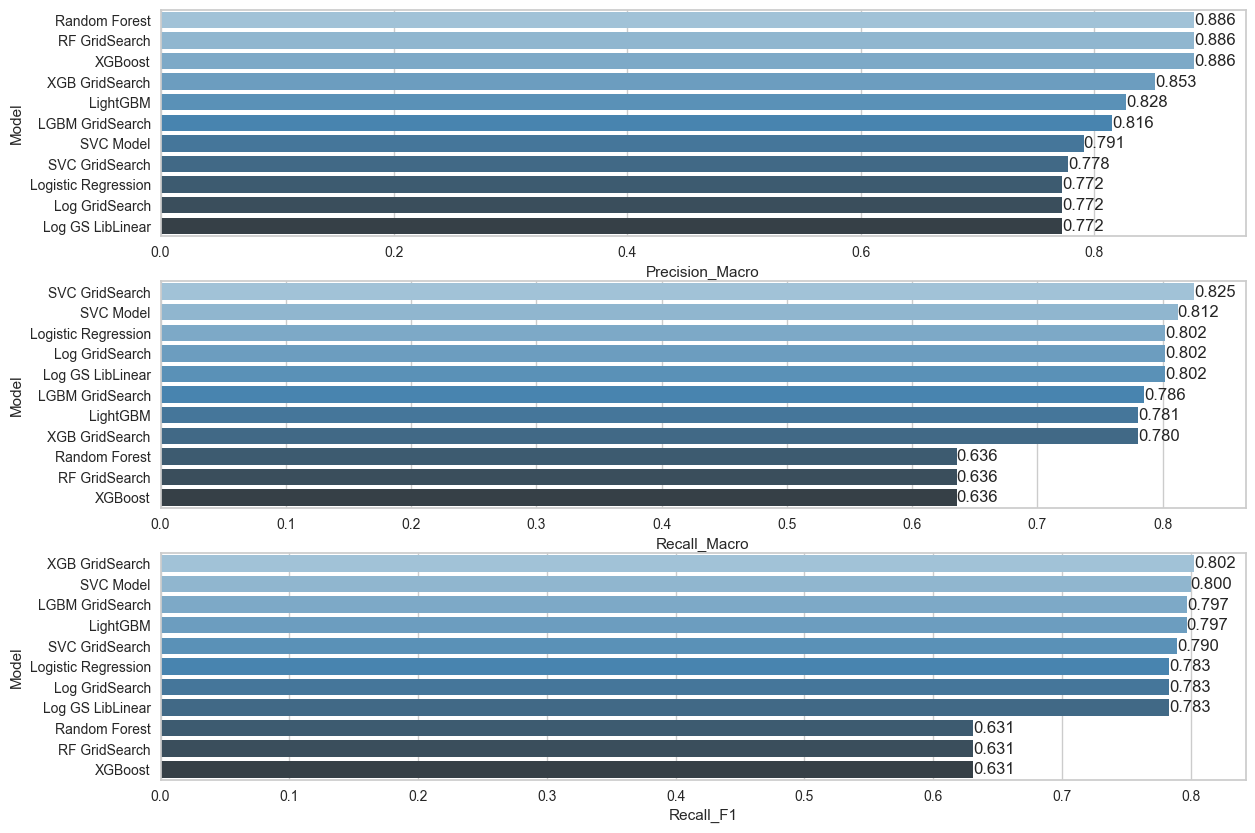

In [185]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Log GridSearch", "Log GS LibLinear", "SVC Model", "SVC GridSearch", 
                                  "Random Forest", "RF GridSearch", "XGBoost", "XGB GridSearch", "LightGBM", "LGBM GridSearch"],
                        "Precision_Macro": [log_female_macro_precision, log_grid_female_macro_precision, log_grid_f_liblinear_macro_precision, svm_female_macro_precision, svm_f_grid_macro_precision, rf_female_macro_precision, rf_f_grid_macro_precision, xgb_female_macro_precision, xgb_f_grid_macro_precision, lgbm_female_macro_precision, lgbm_f_grid_macro_precision],
                        "Recall_Macro": [log_female_macro_recall, log_grid_female_macro_recall, log_grid_f_liblinear_macro_recall, svm_female_macro_recall, svm_f_grid_macro_recall, rf_female_macro_recall, rf_f_grid_macro_recall, xgb_female_macro_recall, xgb_f_grid_macro_recall, lgbm_female_macro_recall, lgbm_f_grid_macro_recall],
                        "Recall_F1": [log_female_macro_f1, log_grid_female_macro_f1, log_grid_f_liblinear_macro_f1, svm_female_macro_f1, svm_f_grid_macro_f1, rf_female_macro_f1, rf_f_grid_macro_f1, xgb_female_macro_f1, xgb_f_grid_macro_f1, lgbm_female_macro_f1, lgbm_f_grid_macro_f1]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Precision_Macro", ascending=False)
ax=sns.barplot(x="Precision_Macro", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall_Macro", ascending=False)
ax=sns.barplot(x="Recall_Macro", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Recall_F1", ascending=False)
ax=sns.barplot(x="Recall_F1", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show() 

### Comparing Models- Male Data Set 

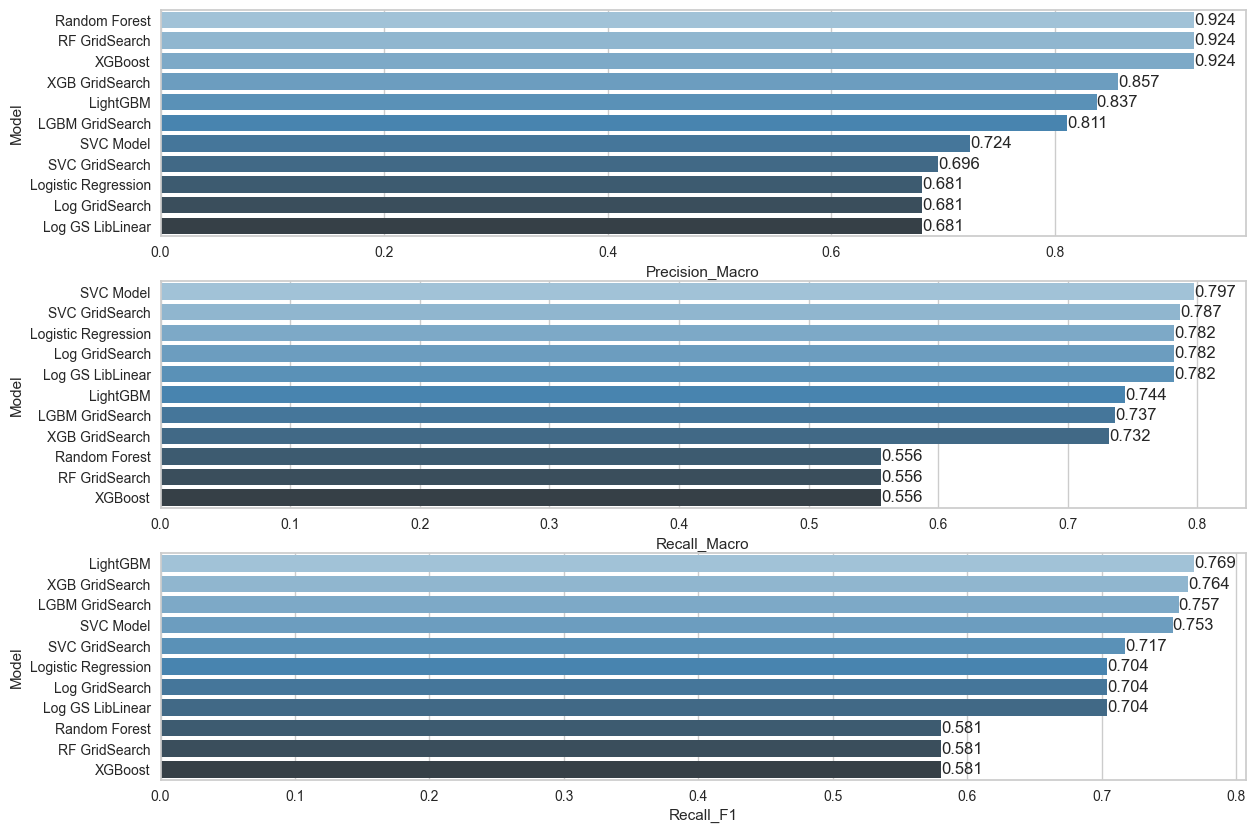

In [186]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Log GridSearch", "Log GS LibLinear", "SVC Model", "SVC GridSearch", 
                                  "Random Forest", "RF GridSearch", "XGBoost", "XGB GridSearch", "LightGBM", "LGBM GridSearch"],
                        "Precision_Macro": [log_male_macro_precision, log_grid_male_macro_precision, log_grid_m_liblinear_macro_precision, svm_male_macro_precision, svm_m_grid_macro_precision, rf_male_macro_precision, rf_m_grid_macro_precision, xgb_male_macro_precision, xgb_m_grid_macro_precision, lgbm_male_macro_precision, lgbm_m_grid_macro_precision],
                        "Recall_Macro": [log_male_macro_recall, log_grid_male_macro_recall, log_grid_m_liblinear_macro_recall, svm_male_macro_recall, svm_m_grid_macro_recall, rf_male_macro_recall, rf_m_grid_macro_recall, xgb_male_macro_recall, xgb_m_grid_macro_recall, lgbm_male_macro_recall, lgbm_m_grid_macro_recall],
                        "Recall_F1": [log_male_macro_f1, log_grid_male_macro_f1, log_grid_m_liblinear_macro_f1, svm_male_macro_f1, svm_m_grid_macro_f1, rf_male_macro_f1, rf_m_grid_macro_f1, xgb_male_macro_f1, xgb_m_grid_macro_f1, lgbm_male_macro_f1, lgbm_m_grid_macro_f1]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Precision_Macro", ascending=False)
ax=sns.barplot(x="Precision_Macro", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall_Macro", ascending=False)
ax=sns.barplot(x="Recall_Macro", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Recall_F1", ascending=False)
ax=sns.barplot(x="Recall_F1", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show() 

**We choose Logistic Regression by performing GridSearch because,** 

**1 -** Overfitting is one of the most common problems in data science, which mostly comes from the high complexity of the model and the lack of data points.
The XGBoost and LightGBM are overfitting even when we perform Grid Search. These two boosting models are most likely to overfit the training data because of the high complexity of the data. 

**2-** Even if the SVC model scores, especially F1_macro (since we have an imbalance of data, we consider the F1 score), a bit better than Logistic Regression, the Log model has a more robust structure, efficiently understands feature importances and feature significances and gives reliable predictions. 

-----------------------

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

## Best Model 

In [45]:
best_model_female = log_grid_female
best_model_female 

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None]},
             scoring='f1_macro')

In [46]:
best_model_female.fit(X_f,y_f) 

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None]},
             scoring='f1_macro')

In [47]:
y_f_pred = best_model_female.predict(X_f) 
print(confusion_matrix(y_f, y_f_pred))
print(classification_report(y_f, y_f_pred))

[[712  29 153]
 [ 22 533  54]
 [ 40  24 156]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       894
           1       0.91      0.88      0.89       609
           2       0.43      0.71      0.54       220

    accuracy                           0.81      1723
   macro avg       0.75      0.79      0.76      1723
weighted avg       0.85      0.81      0.83      1723



In [48]:
best_model_male = log_grid_male
best_model_male 

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None]},
             scoring='f1_macro')

In [49]:
best_model_male.fit(X_m,y_m)  

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None]},
             scoring='f1_macro')

In [50]:
y_m_pred = best_model_male.predict(X_m) 
print(confusion_matrix(y_m, y_m_pred)) 
print(classification_report(y_m, y_m_pred)) 

[[2040  123  524]
 [  21  538   43]
 [  97   33  293]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2687
           1       0.78      0.89      0.83       602
           2       0.34      0.69      0.46       423

    accuracy                           0.77      3712
   macro avg       0.69      0.78      0.71      3712
weighted avg       0.85      0.77      0.80      3712



## Save Models 

In [189]:
# # # Save the model for the female data set to a file using pickle
with open('log_female.pkl', 'wb') as file:
      pickle.dump(best_model_female, file) 

In [190]:
# # # Save the model for the female data set to a file using pickle
with open('log_male.pkl', 'wb') as file:
      pickle.dump(best_model_male, file) 

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

## Logistic Regression Over/Under Sampling

In [51]:
df_female['DODRace'].value_counts() 

0    894
1    609
2    220
Name: DODRace, dtype: int64

In [52]:
df_male['DODRace'].value_counts() 

0    2687
1     602
2     423
Name: DODRace, dtype: int64

In [54]:
pip install -U imbalanced-learn


   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ------ -------------------------------- 41.0/235.6 kB 960.0 kB/s eta 0:00:01
   -------------------------- ------------- 153.6/235.6 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.8 MB/s eta 0:00:00


In [55]:
# Import Required Libraries for Smote 

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from collections import Counter 

### Applying SMOTE for Female Data Set 

In [56]:
female_class_distribution = [894, 609, 220]

# Display class distribution before applying SMOTE

print("Class distribution before SMOTE:", Counter(y_f_train)) 

Class distribution before SMOTE: Counter({0: 715, 1: 487, 2: 176})


In [57]:
# Apply TomekLinks for under-sampling

tl = TomekLinks()
X_f_resampled, y_f_resampled = tl.fit_resample(X_f_train, y_f_train) 

In [58]:
# Display class distribution after under-sampling

print("Class distribution after under-sampling:", Counter(y_f_resampled)) 

Class distribution after under-sampling: Counter({0: 680, 1: 461, 2: 176})


In [59]:
# Apply SMOTE for over-sampling

smote = SMOTE(sampling_strategy='auto')
X_f_resampled, y_f_resampled = smote.fit_resample(X_f_resampled, y_f_resampled) 

In [60]:
# Display class distribution after over-sampling

print("Class distribution after SMOTE:", Counter(y_f_resampled)) 

Class distribution after SMOTE: Counter({1: 680, 2: 680, 0: 680})


### Applying SMOTE for Male Data Set 

In [61]:
male_class_distribution = [2687, 602, 423]

# Display class distribution before applying SMOTE

print("Class distribution before SMOTE:", Counter(y_m_train))  

Class distribution before SMOTE: Counter({0: 2149, 1: 482, 2: 338})


In [62]:
# Apply TomekLinks for under-sampling

tl = TomekLinks()
X_m_resampled, y_m_resampled = tl.fit_resample(X_m_train, y_m_train) 

# Display class distribution after under-sampling

print("Class distribution after under-sampling:", Counter(y_m_resampled)) 

Class distribution after under-sampling: Counter({0: 2061, 1: 448, 2: 338})


In [63]:
# Apply SMOTE for over-sampling

smote = SMOTE(sampling_strategy='auto')
X_m_resampled, y_m_resampled = smote.fit_resample(X_m_resampled, y_m_resampled) 

# Display class distribution after over-sampling

print("Class distribution after SMOTE:", Counter(y_m_resampled)) 

Class distribution after SMOTE: Counter({0: 2061, 1: 2061, 2: 2061})


## Fitting The Best Model with Resampled Female Data Set 

In [64]:
# Train the best model on the resampled data

best_model_female.fit(X_f_resampled, y_f_resampled)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None]},
             scoring='f1_macro')

In [67]:
# Make predictions on the test set
y_f_pred = best_model_female.predict(X_f_test) 

print("Confusion Matrix:")
print(confusion_matrix(y_f_test, y_f_pred))

print("\nClassification Report:")
print(classification_report(y_f_test, y_f_pred)) 

Confusion Matrix:
[[148   5  26]
 [  5 114   3]
 [  8   6  30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       179
           1       0.91      0.93      0.92       122
           2       0.51      0.68      0.58        44

    accuracy                           0.85       345
   macro avg       0.78      0.81      0.79       345
weighted avg       0.86      0.85      0.85       345



## Fitting The Best Model with Resampled Male Data Set 

In [68]:
# Train the best model on the resampled data

best_model_male.fit(X_m_resampled, y_m_resampled) 

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None]},
             scoring='f1_macro')

In [69]:
# Make predictions on the test set
y_m_pred = best_model_male.predict(X_m_test) 

print("Confusion Matrix:")
print(confusion_matrix(y_m_test, y_m_pred))

print("\nClassification Report:")
print(classification_report(y_m_test, y_m_pred)) 

Confusion Matrix:
[[410  16 112]
 [  5 112   3]
 [ 19  10  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       538
           1       0.81      0.93      0.87       120
           2       0.33      0.66      0.44        85

    accuracy                           0.78       743
   macro avg       0.69      0.78      0.72       743
weighted avg       0.85      0.78      0.80       743



#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

## Shap values for all data

In [70]:
pip install shap 

   ---------------------------------------- 0.0/448.0 kB ? eta -:--:--
   ------------- -------------------------- 153.6/448.0 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------  440.3/448.0 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 448.0/448.0 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 16.8 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.6 MB 13.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 12.9 MB/s eta 0:00:01
   --------------------------------- ------ 2.2/2.6 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 10.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
    --------------------------------------- 0.5/28.1 MB 16.2 MB/s eta 0:00:02
   - -----

In [71]:
# Import Library 

import shap 

### SHAP Values For Female Data 

In [76]:
# Train the logistic regression model (best model) with the specified parameters

log_model_f = LogisticRegression(C=7.847599703514611, class_weight=None)

log_model_f.fit(X_f_train, y_f_train) 

LogisticRegression(C=7.847599703514611)

In [78]:
# Create a SHAP explainer object

explainer_f = shap.Explainer(log_model_f, X_f_train)  

In [79]:
# Calculate SHAP values for all data points

shap_values_f = explainer_f.shap_values(X_f_train) 

In [80]:
# We can now use shap_values for further analysis or visualization
# We want to get SHAP values for the first instance in our dataset
shap_values_instance = shap_values_f[0]

# Print SHAP values for the first instance
print("SHAP Values for the First Instance:")
print(shap_values_instance) 

SHAP Values for the First Instance:
[[-8.89091540e-02 -2.49404274e+00 -1.73996611e-01 ...  8.49264656e-01
   1.44269331e-02 -1.68503095e-03]
 [ 2.33183896e-02 -9.07370515e-02 -8.94296069e-02 ... -6.09068592e-01
   8.26139302e-02 -1.68503095e-03]
 [ 8.98236007e-02  1.94471573e+00  2.69980161e-01 ... -9.43627396e-02
  -1.90134058e-01 -1.68503095e-03]
 ...
 [ 1.02293328e-01  8.90204046e-01 -8.94296069e-02 ...  7.63480347e-01
  -1.11180693e-01 -1.68503095e-03]
 [ 2.74749653e-02 -1.14524873e+00 -1.21142233e-01 ...  8.49264656e-01
   1.80157224e-02  1.93778559e-02]
 [ 1.35545933e-01  2.31256864e+00  1.74842281e-01 ... -8.57843087e-03
   8.62027196e-02 -1.68503095e-03]]


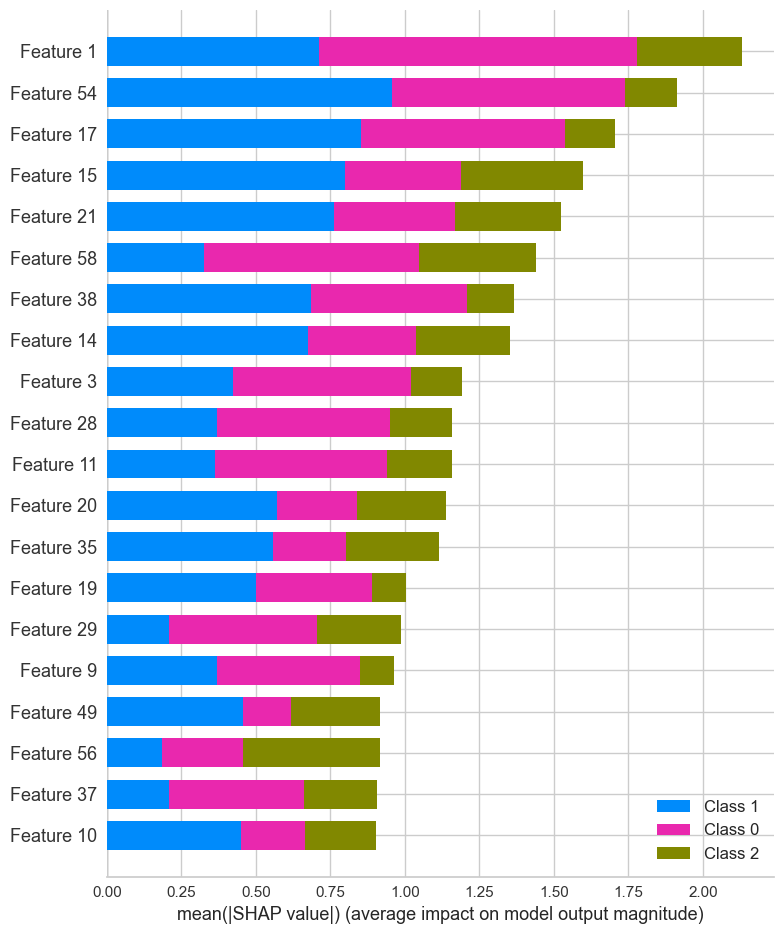

In [81]:
# Summary plot
shap.summary_plot(shap_values_f, X_f_train, plot_type="bar", show=False)
plt.show() 

### SHAP Values For Male Data  

In [91]:
# Train the logistic regression model (best model) with the specified parameters

log_model_m = LogisticRegression(C=0.42813323987193935, class_weight=None)

log_model_m.fit(X_m_train, y_m_train) 

LogisticRegression(C=0.42813323987193935)

In [92]:
# Create a SHAP explainer object

explainer_m = shap.Explainer(log_model_m, X_m_train)  

In [93]:
# Calculate SHAP values for all data points

shap_values_m = explainer_m.shap_values(X_m_train) 

In [94]:
# We can now use shap_values for further analysis or visualization
# We want to get SHAP values for the first instance in our dataset
shap_values_instance = shap_values_m[0]

# Print SHAP values for the first instance
print("SHAP Values for the First Instance:")
print(shap_values_instance) 

SHAP Values for the First Instance:
[[-0.02593257 -0.37900672 -0.09819157 ...  0.07921748  0.18744941
  -0.0151126 ]
 [-0.29665722 -0.12887658 -0.10677475 ...  0.39950377 -0.16652688
  -0.0151126 ]
 [ 0.12367842  0.87164399  0.2022197  ... -0.56135511 -0.21709493
  -0.0151126 ]
 ...
 [ 0.20204608 -0.9388218   0.06488883 ...  0.03651264 -0.05906979
  -0.0151126 ]
 [ 0.03818642  0.66915768  0.2022197  ... -0.9884035   0.0547083
  -0.0151126 ]
 [-0.23253822 -0.18843137  0.15930381 ...  0.50626587 -0.05274879
  -0.0151126 ]]


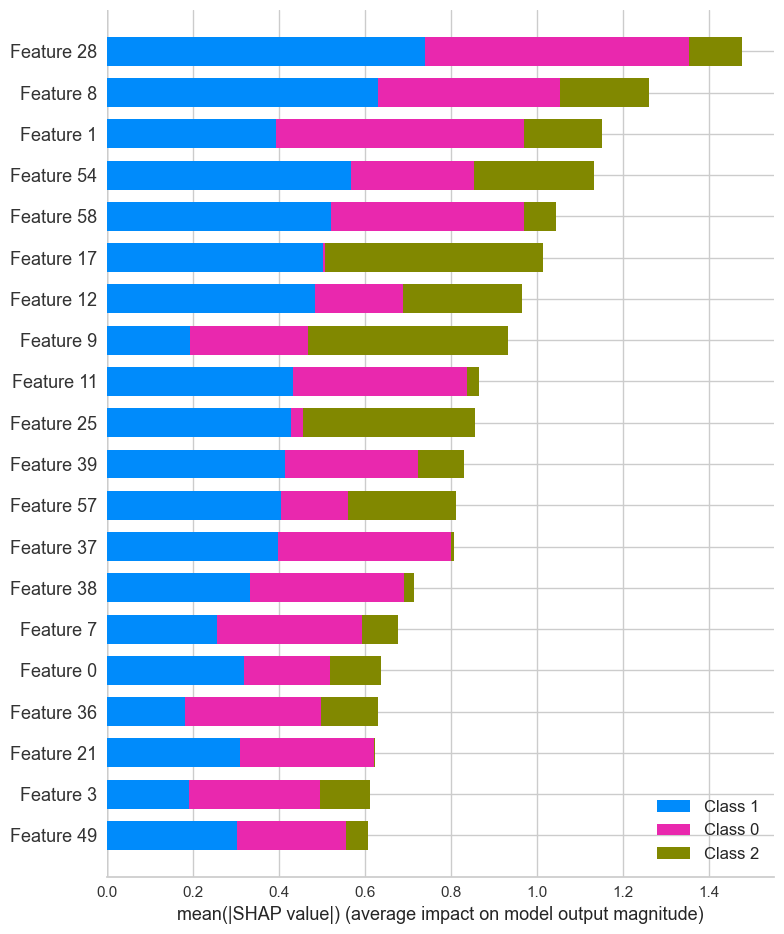

In [95]:
# Summary plot
shap.summary_plot(shap_values_m, X_m_train, plot_type="bar", show=False)
plt.show() 